In [65]:
!pip install tweepy --upgrade

In [66]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nehabangera333","key":"a5e046963dcdefbac5ccff9559a4b3ae"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kazanova/sentiment140
print("Dataset ready! File name: training.1600000.processed.noemoticon.csv")

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset ready! File name: training.1600000.processed.noemoticon.csv


In [ ]:
!pip install -q pandas numpy scikit-learn nltk matplotlib seaborn wordcloud

In [ ]:
# for downloading datasets
print("downloading sentiment140 (1.6 M tweets)...")
!wget -q --show-progress "https://github.com/kazanova/sentiment140/raw/master/training.1600000.processed.noemoticon.csv" -O tweets.csv
print("data successfully downloaded!")

downloading sentiment140 (1.6 M tweets)...
data successfully downloaded!


In [ ]:

!unzip -q sentiment140.zip


!ls -lh training.1600000.processed.noemoticon.csv

-rw-r--r-- 1 root root 228M Sep 21  2019 training.1600000.processed.noemoticon.csv


In [69]:
df_small = df[['text', 'clean_text', 'sentiment']].sample(20000, random_state = 42)
df_small.to_csv('dashboard_sample.csv', index = False)
print("saved dashboard_sample.csv - ready for stream lit")

KeyError: "['clean_text'] not in index"

In [67]:
import pandas as pd
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding='latin-1',
                 header=None,
                 names=['sentiment', 'id', 'date', 'query', 'user', 'text'] )

df['sentiment'] = df['sentiment'].map({0:'negative', 4:'positive'})

print(df['sentiment'].value_counts())
print("columns in df : ", df.columns.tolist())
print(df.head(3))

sentiment
negative    800000
positive    800000
Name: count, dtype: int64
columns in df :  ['sentiment', 'id', 'date', 'query', 'user', 'text']
  sentiment          id                          date     query  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  


In [ ]:
print(df)

        sentiment          id                          date     query  \
0        negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1        negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2        negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3        negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...           ...         ...                           ...       ...   
1599995  positive  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  positive  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  positive  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  positive  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999  positive  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  \
0        _TheSpecialOne_  @switchfoot http:/

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

test shape: (320000, 5000)

 training models ...

 logistic regression - Accuracy: 0.7759
              precision    recall  f1-score   support

    negative       0.79      0.75      0.77    160000
    positive       0.76      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000


 naive bayes - Accuracy: 0.7582
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76    160000
    positive       0.76      0.75      0.76    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000


 Linear svm - Accuracy: 0.7750
              precision    recall  f1-score   support

    negative       0.79      0.74      0.77    160000
    positive       0.76      0.81      0.78    160000

    accuracy               

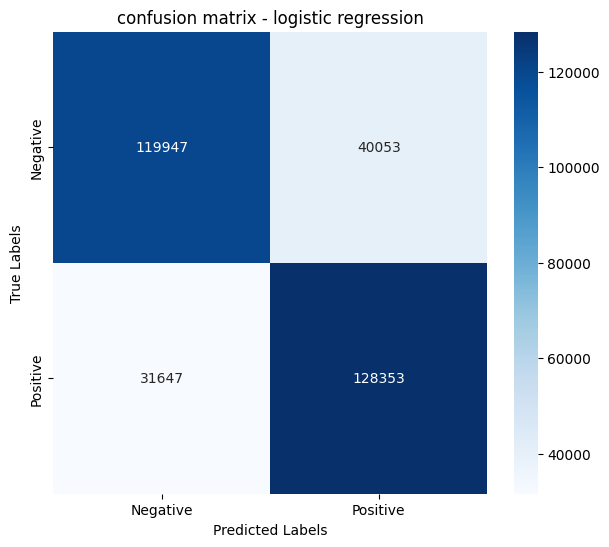

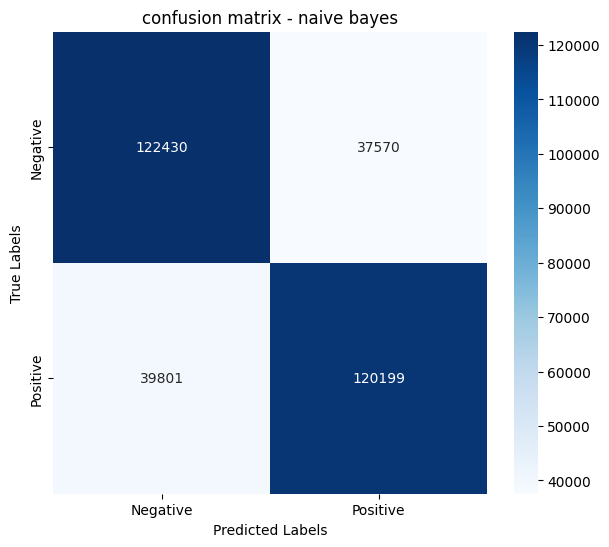

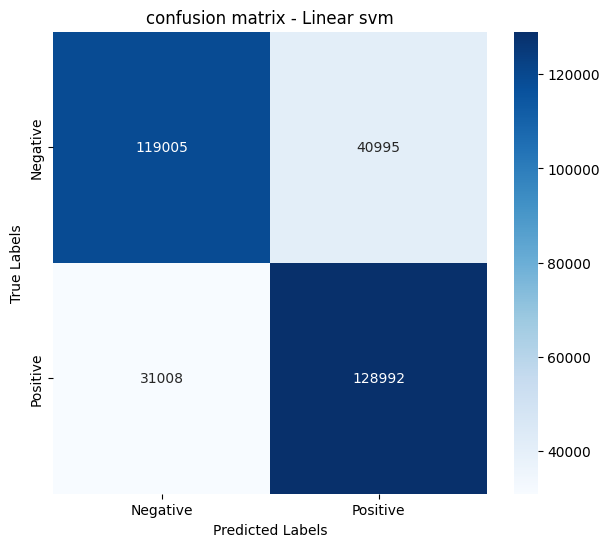

In [70]:
print("test shape:", x_test.shape)

# models to compare
models = {
    "logistic regression" : LogisticRegression(max_iter = 1000, n_jobs = -1),
    "naive bayes" : MultinomialNB(),
    "Linear svm" : LinearSVC(max_iter = 1000)
}

results = {}

print("\n training models ...")
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  acc = accuracy_score(y_test, y_pred)
  results[name] = acc

  print(f"\n {name} - Accuracy: {acc:.4f}")
  print( classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred, labels = ['negative', 'positive'])
  plt.figure(figsize = (7, 6))
  sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
              xticklabels = ['Negative', 'Positive'],
              yticklabels = ['Negative', 'Positive'])
  plt.title(f'confusion matrix - {name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')

print("\n model comparison:")
print(pd.Series(results).sort_values(ascending = False).to_frame(name = 'Accuracy'))

best_model_name = max(results, key = results.get)
best_model = models[best_model_name]
print(f"\n Best model: {best_model_name} ({results[best_model_name]:.4f})")

import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("best model and vectorizer saved")


In [72]:
import streamlit as st
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'@\w+|#', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower().strip()

  tokens = word_tokenize(text)
  tokens =[lemmatizer.lemmatize(word) for word in tokens
           if word not in stop_words and len(word) > 2]
  return ' '.join(tokens)

# If you already have clean_text column → good
# If not, create small sample with clean_text
df_small = df[['text', 'sentiment']].sample(20000, random_state=42).copy()

with st.spinner("Creating clean_text for dashboard sample (this is one-time)..."):
    df_small['clean_text'] = df_small['text'].apply(clean_text)

df_small.to_csv('dashboard_sample.csv', index=False)
print("Created dashboard_sample.csv with 20,000 rows + clean_text column")

2026-02-23 14:20:52.310 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Created dashboard_sample.csv with 20,000 rows + clean_text column


In [77]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'@\w+|#', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower().strip()

  tokens = word_tokenize(text)
  tokens =[lemmatizer.lemmatize(word) for word in tokens
           if word not in stop_words and len(word) > 2]
  return ' '.join(tokens)

@st.cache_resource
def load_model():
  try:
    model = joblib.load('best_model.pkl')
    vectorizer = joblib.load('vectorizer.pkl')
    return model, vectorizer
  except FileNotFoundError:
    st.error(f"Failed to load model/vectorizer: {e}")
    return None, None

model, vectorizer = load_model()

if model is None or vectorizer is None:
  st.stop()


st.title("brand sentiment dashboard")

st.header("overall sentiment distribution"), joblib.load('vectorizer.pkl')

model, vectorizer = load_model()

# load sample data
@st.cache_data
def load_data():
  try:
    df = pd.read_csv('dashboard_sample.csv')
    if 'clean_text' not in df.columns:
      with st.spinner("cleaning tweets..."):
        df['clean_text'] = df['text'].apply(clean_text)
    return df
  except FileNotFoundError:
    st.warning("dashboard_sample.csv not found. Please run the previous cells to generate it.")
    return pd.DataFrame({'sentiment' : ['positive']*100 + ['negavtive']*100})

df = load_data()

st.title("twittwe brand sentiment dashboard!")

fig_pie = px.pie(df, names = 'sentiment', title = 'sentiment distribution')
fig_pie.update_traces(textposition = 'inside', textinfo = 'percent+label')
st.plotly_chart(fig_pie, use_container_width = True)

st.header("predict sentiment for new tweet")

tweet_input = st.text_area("enter your tweet here:", value = "I love this product, it's amazing!", height = 130)
if st.button("Analyze", type = "primary"):
  if tweet_input.strip():
    with st.spinner("analyzing..."):
      cleaned = clean_text(tweet_input)
      if not cleaned.strip():
        st.warning("empty tweet. please enter a valid tweet")
      else:
        vec = vectorizer.transform([cleaned])
        prediction = model.predict(vec)[0]
        if prediction == "positive":
            st.success(f"predicted sentiment: *{prediction}*")
        else:
            st.error(f"predicted sentiment: *{prediction}*")
        with st.expander("cleaned text"):
            st.code(cleaned)
  else:
    st.warning("please enter a tweet before predicting!")


Overwriting app.py


In [ ]:
!pip install -q streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.6 MB/s eta 0:00:00


In [78]:
from pyngrok import ngrok
import os

!pkill -f ngrok

get_ipython().system_raw('streamlit run app.py &')


import time
time.sleep(5)

public_url = ngrok.connect(8501, "http")
print("Your Streamlit dashboard is live at:")
print(public_url)

Your Streamlit dashboard is live at:
NgrokTunnel: "https://uncaroled-paraesthetic-shirly.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!ngrok config add-authtoken 39vt8lLBnwM80QFThAmhUYS0JBm_5AqSB6FSAZZNrP2pS43vj

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
